In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import  files
files.upload()

Saving winequality-red (1).csv to winequality-red (1).csv


{'winequality-red (1).csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5\n8.9;0.62;0.19;3.

In [ ]:
df = pd.read_csv('winequality-red (1).csv',sep = ';')


In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.shape

(1599, 12)

*   dataset comprises of 1599 observations and 12 chracteriestics
*   out of which one is dependent variable and rest 11 are independent variables - physicochemical characteristics



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB




*   All the independent variables are float or decimal in nature
*   Quality is a categorical variable of integer type.




In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



*   Mean value is more than median value of each column represented by 50%(50th
percentile) in index column.
*   large differnece in 75th %tile and max values of predictors "residual sugar","free sulfur dioxide","total sulfur dioxide"



In [ ]:
df.isnull().any().any()

False



*   There are no missing values in the data.




In [ ]:
for col in df.columns.values:
  print ("No. of unique values of {}:{}".format(col,df[col].nunique()))

No. of unique values of fixed acidity:96
No. of unique values of volatile acidity:143
No. of unique values of citric acid:80
No. of unique values of residual sugar:91
No. of unique values of chlorides:153
No. of unique values of free sulfur dioxide:60
No. of unique values of total sulfur dioxide:144
No. of unique values of density:436
No. of unique values of pH:89
No. of unique values of sulphates:96
No. of unique values of alcohol:65
No. of unique values of quality:6


*   The feature that has a maximum unique value is density.
*  The feature that has a minimum unique value is quality.



In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

*   This tells us vote count of each quality score in descending order.
*   "quality" has most values concentrated in the categories 5, 6 and 7.
*   Only a few observations made for the categories 3 & 9






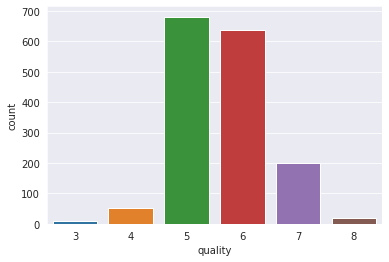

In [ ]:
sns.countplot(x ='quality',data = df)

In [ ]:
import matplotlib.pyplot as plt
plt.savefig('foo.png')


<Figure size 432x288 with 0 Axes>


*   "quality" score scale ranges from 1 to 10;where 1 being poor and 10 being the best.
*   1,2 & 10 Quality ratings are not given by any obseravtion.Only scores obtained are between 3 to 8.



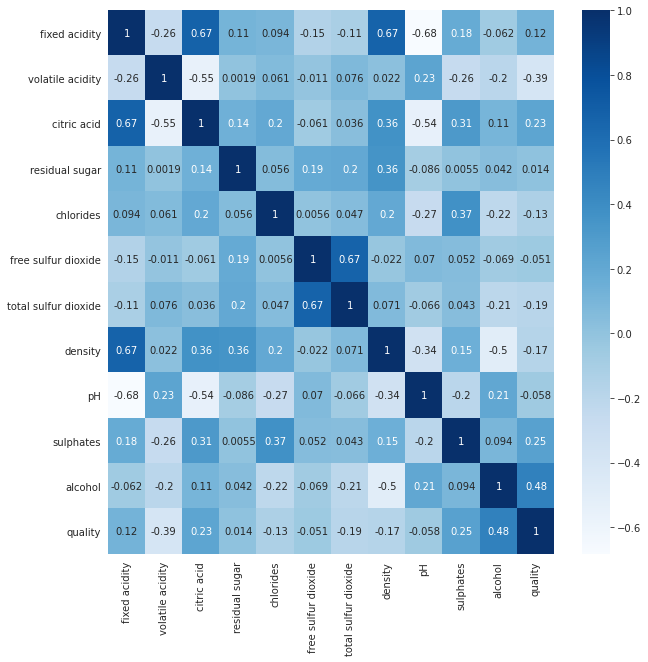

In [ ]:
plt.figure(figsize=(10,10))
sns_plot=sns.heatmap(df.corr(),cmap= 'Blues',annot = True)


*   Sulphates helps us in identifying good quality wines.
*   Higher level of alcohols constitutes for higher quality wine.

* Here we can infer that "density" has strong positive correlation with "residual sugar" whereas it has strong negative correlation with "alcohol".
"free sulphur dioxide" and "citric acid" has almost no correlation with "quality"
Since correlation is zero we can infer there is no linear relationship between these two predictors.







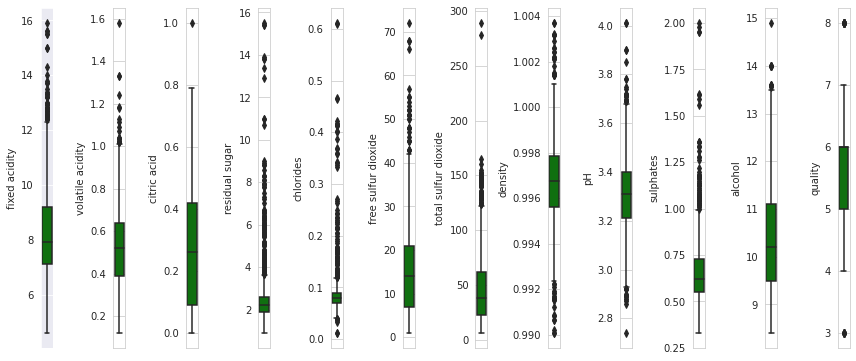

In [ ]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()



*   Except "alcohol" all other features columns shows outliers




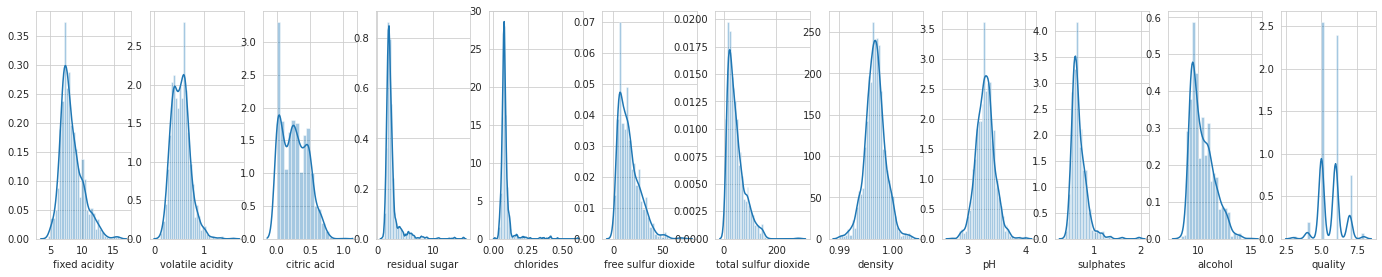

In [ ]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)



*   "pH" column appears to be normally distributed
remaining all independent variables are right skewed/positively skewed.




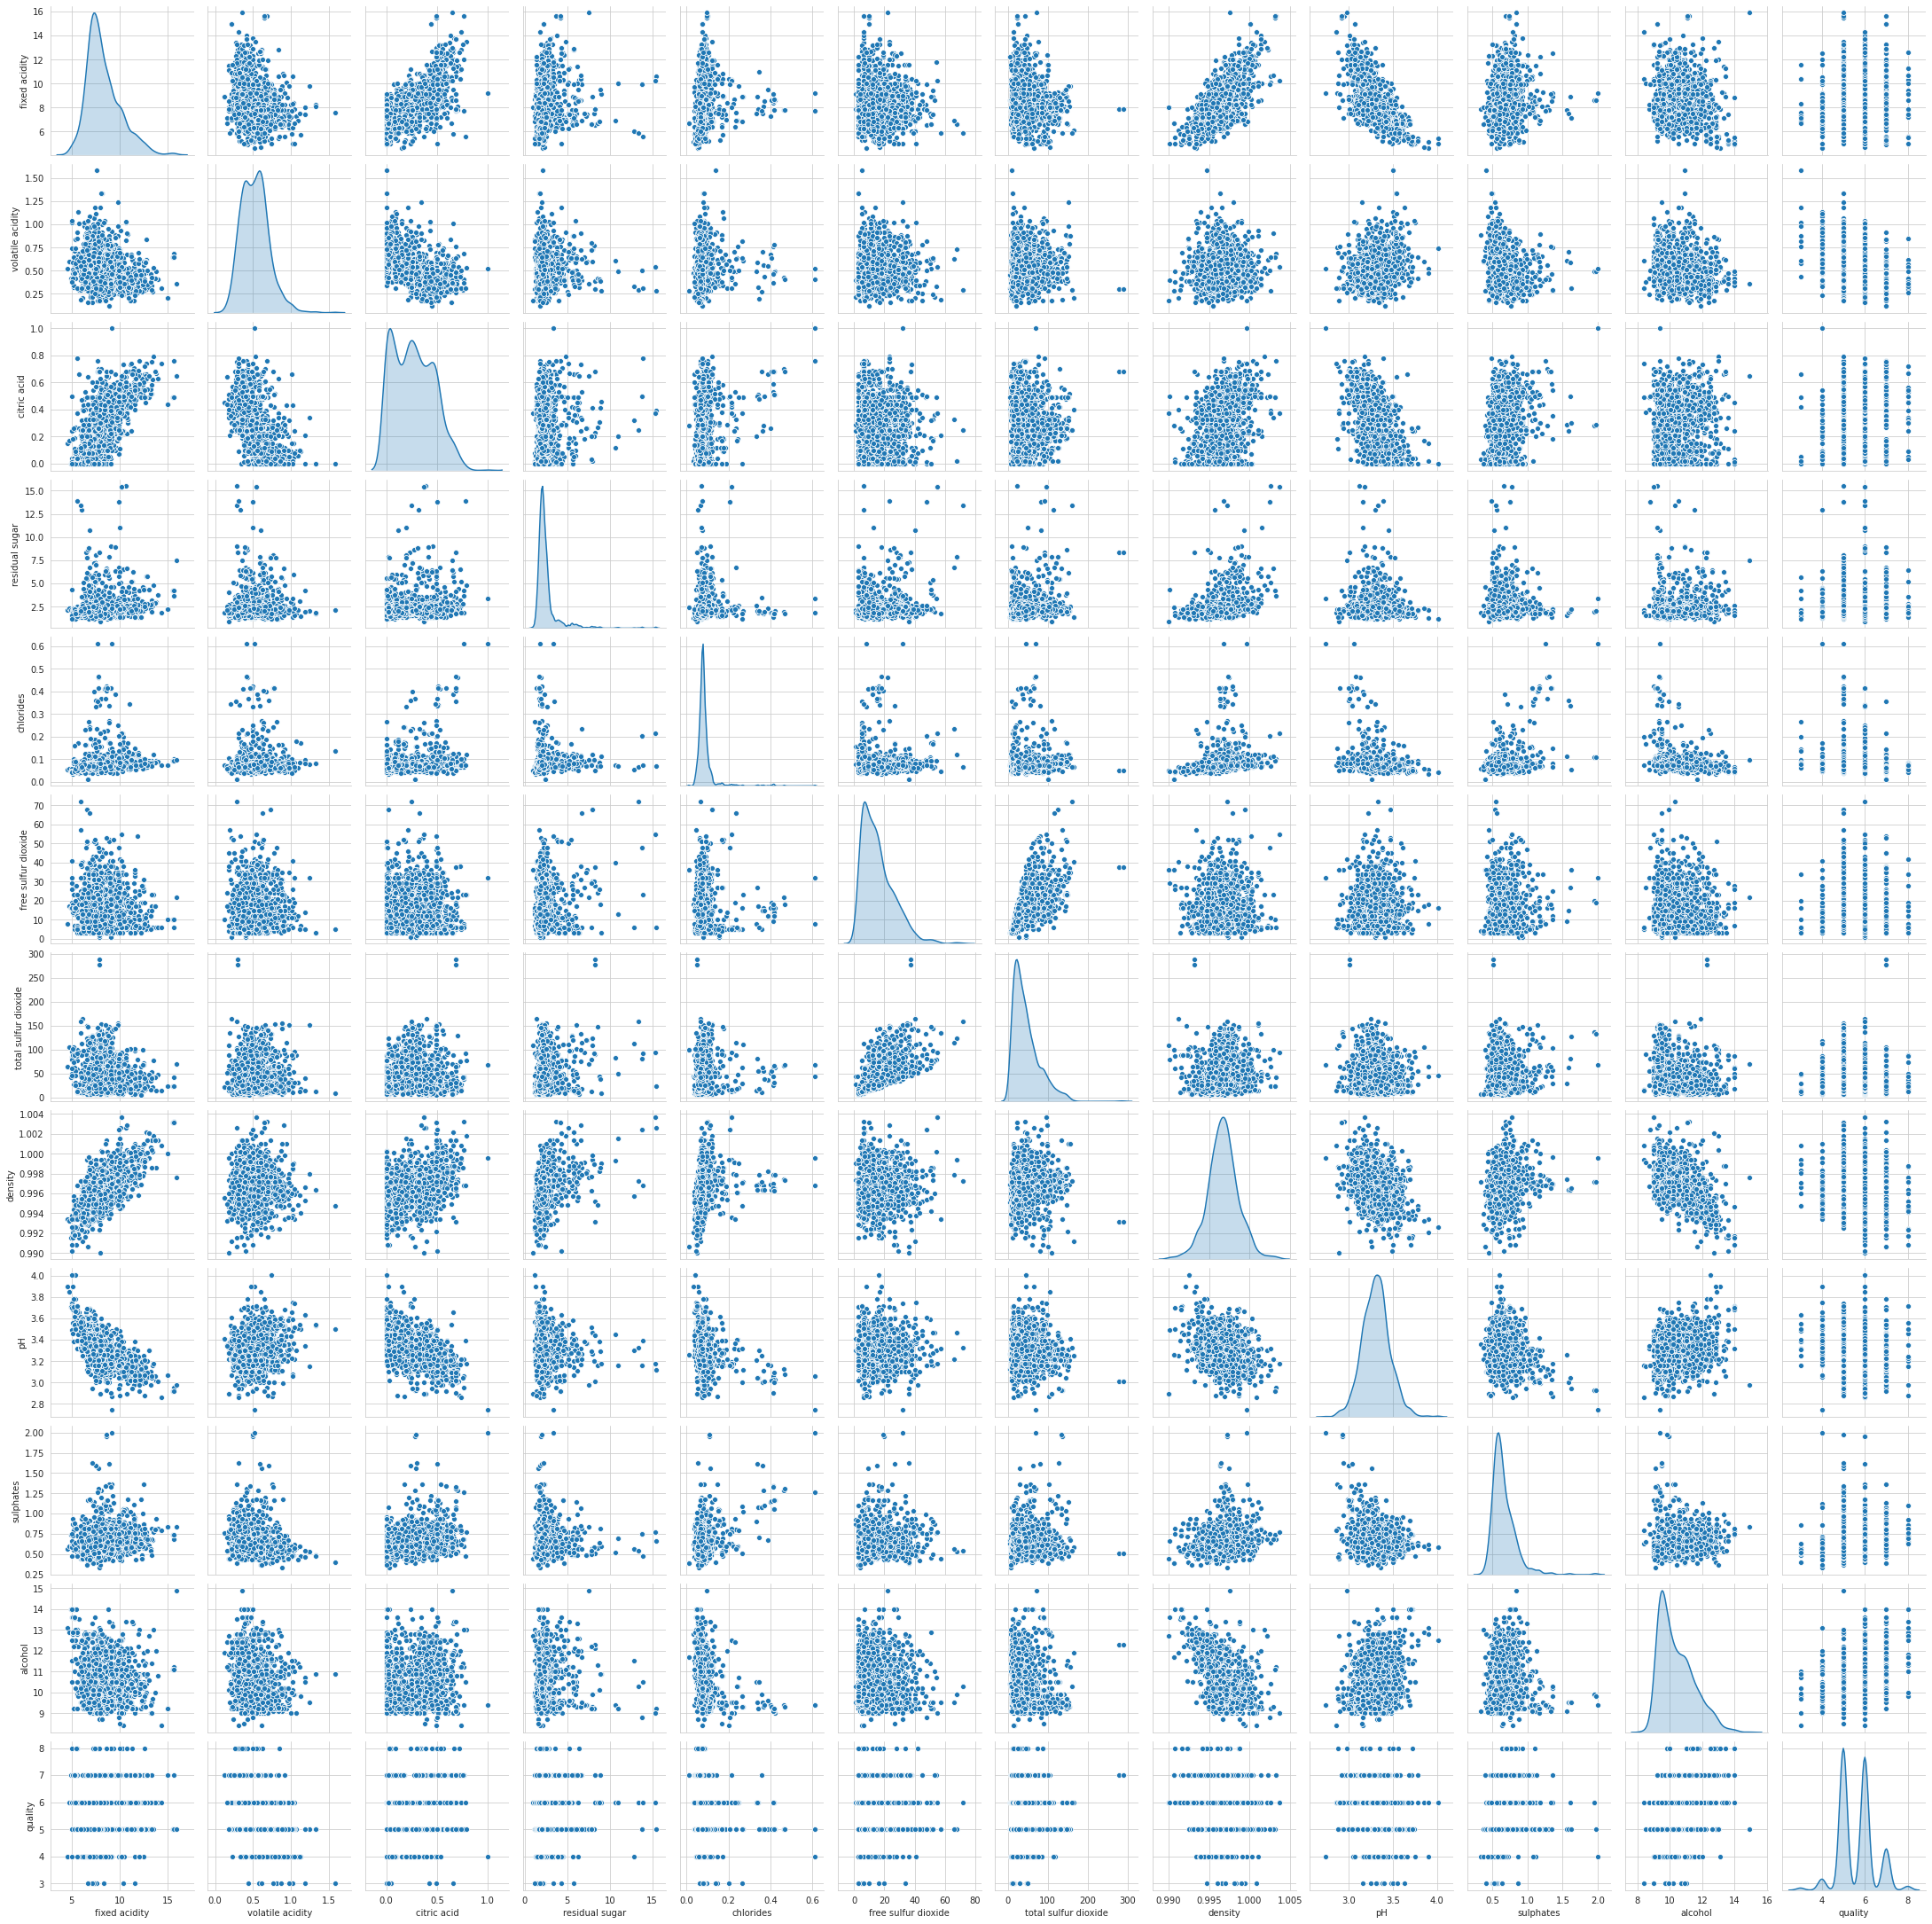

In [ ]:
sns.pairplot(data=df,kind= 'scatter',diag_kind = 'kde')



*   Above pairplot shows the relationship among various features for all the possible pair of features.
  



**Fixed Acidity vs Volatile Acidity**

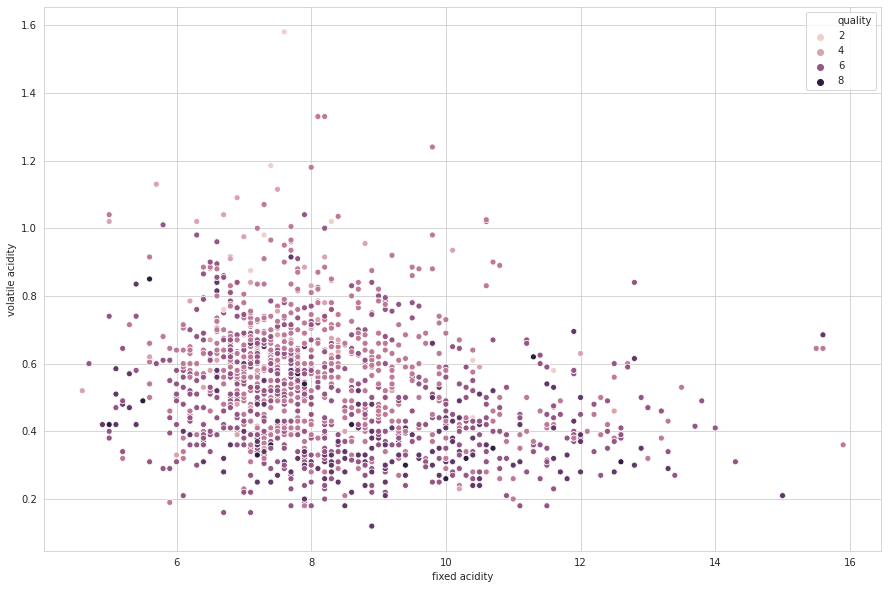

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='fixed acidity',y='volatile acidity',hue='quality',data=df)

*   Lower volatile acidity gives higher quality
*   Fixed acidity does not affect quality much
*   Fixed acidity does not affect quality much






In [ ]:
df.rename(columns={"residual sugar": "residual_sugar"}, inplace=True)

**Citric Acid vs Residual Sugar**

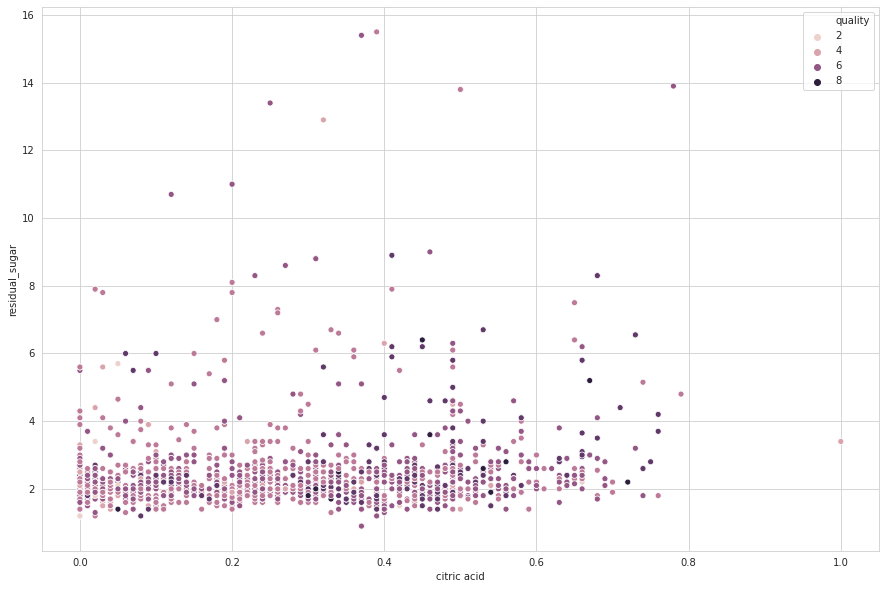

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='citric acid',y='residual_sugar',hue='quality',data=df)

*   Residual sugar does not help understanding quality, its always low with few outliers.
*   Citric acid helps us understand higher quality wines



Chloride vs Total sulfur dioxide

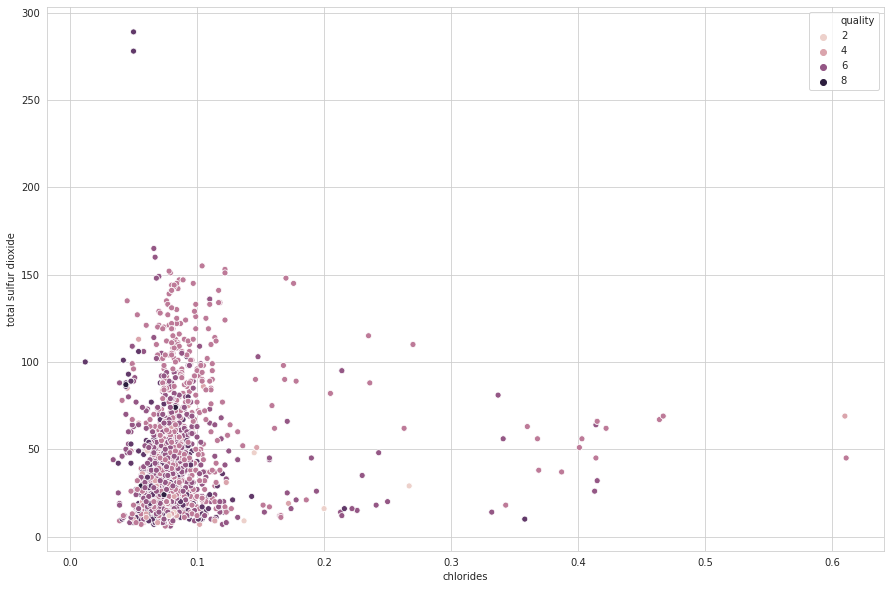

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='chlorides',y='total sulfur dioxide',hue='quality',data=df)

*  Chlorides don't vary quality of wine.
*  Total Sulfur dioxide does not affects quality



**Density vs sulphates**

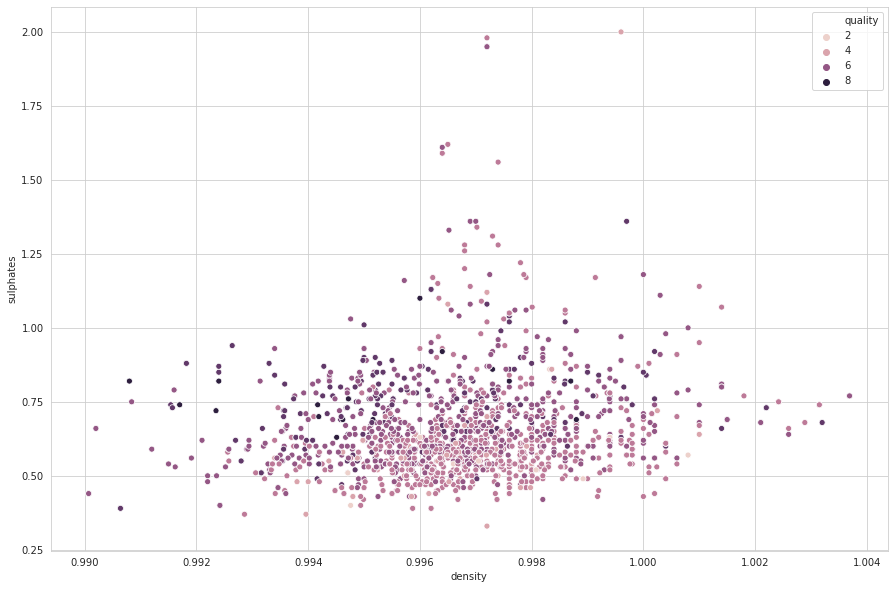

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='density',y='sulphates',hue='quality',data=df)

*   Sulphates helps us in identifying good quality wines.
*   Density does not affect as much.



**Quality vs fixed Acidity**

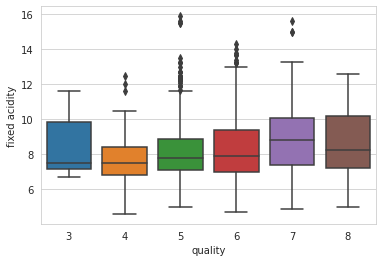

In [ ]:
sns.boxplot('quality','fixed acidity',data = df)


Quality tends to increase as alcohol by volume levels increase. It appears that wine drinkers prefer wine with a higher ABV level, as they feel some of the effects of inebriation.

**Quality vs volatile acidity**

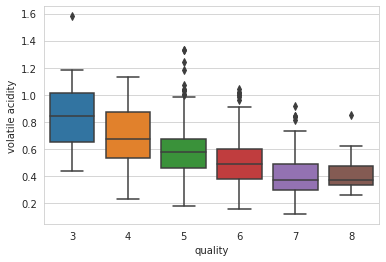

In [ ]:
sns.boxplot('quality', 'volatile acidity', data = df)

**Quality vs citric acid**

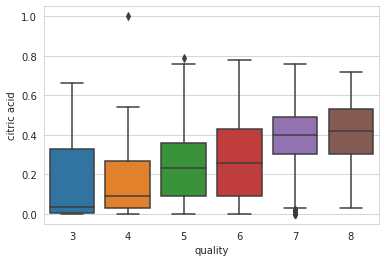

In [ ]:
sns.boxplot('quality', 'citric acid', data = df)

**Quality vs Residual Sugar**

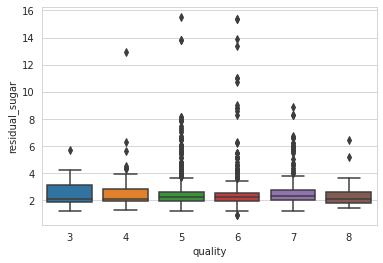

In [ ]:
sns.boxplot('quality', 'residual_sugar', data = df)

**Quality vs Chloride**

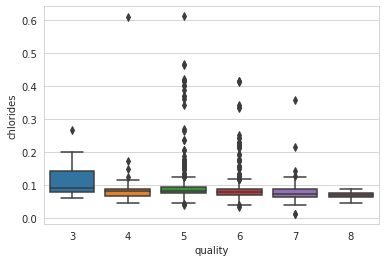

In [ ]:
sns.boxplot('quality', 'chlorides', data = df)

**Quality vs Free Sulfur dioxide**


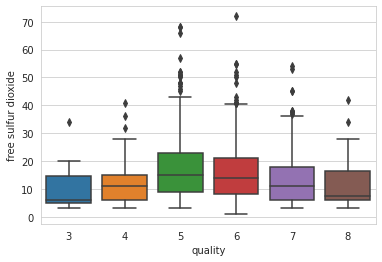

In [ ]:
sns.boxplot('quality', 'free sulfur dioxide', data = df)

**Quality vs Total Sulphur dioxide**

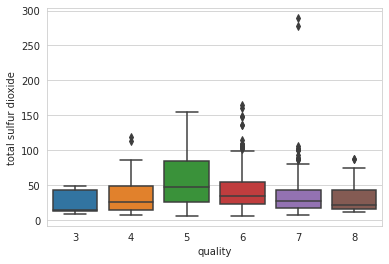

In [ ]:
sns.boxplot('quality', 'total sulfur dioxide', data = df)

**Quality vs Density**

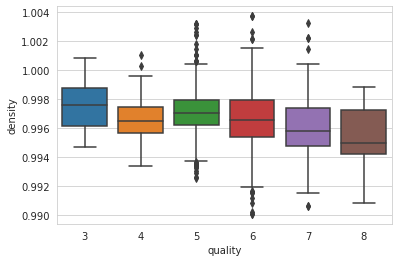

In [ ]:
sns.boxplot('quality', 'density', data = df)

**Quality vs Ph**

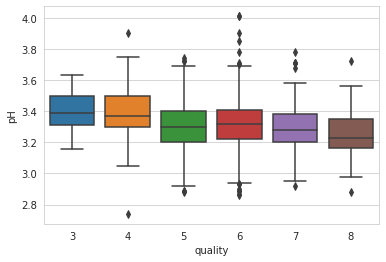

In [ ]:
sns.boxplot('quality', 'pH', data = df)

**Quality vs Sulphates**

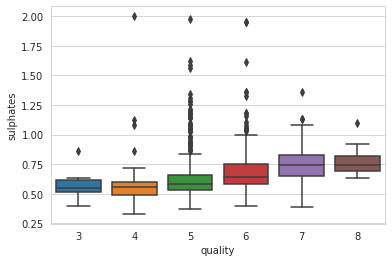

In [ ]:
sns.boxplot('quality', 'sulphates', data = df)

**Quality vs Alcohol**

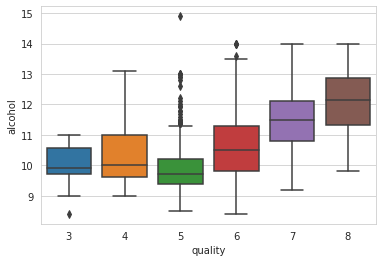

In [ ]:
sns.boxplot('quality', 'alcohol', data = df)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm


In [ ]:
X = df[list(df.columns)[:-1]]
Y = df['quality']